# Load Library

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import missingno

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

In [ ]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
#df = pd.read_csv(url, header=None)

UnicodeDecodeError: ignored

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/processed_cleveland.csv', sep=',') 

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
#df.columns = ['Age','Sex','Cp','Trestbps','Chol','Fbs','Restecg','Thalach','Exang','Oldpeak','Slope','Ca','Thal','Label']

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Check Data

In [ ]:
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


# Analisis Missing Value

In [ ]:
df.replace("?", np.nan, inplace= True)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.loc[:, df.isnull().any()].columns

Index(['ca', 'thal'], dtype='object')

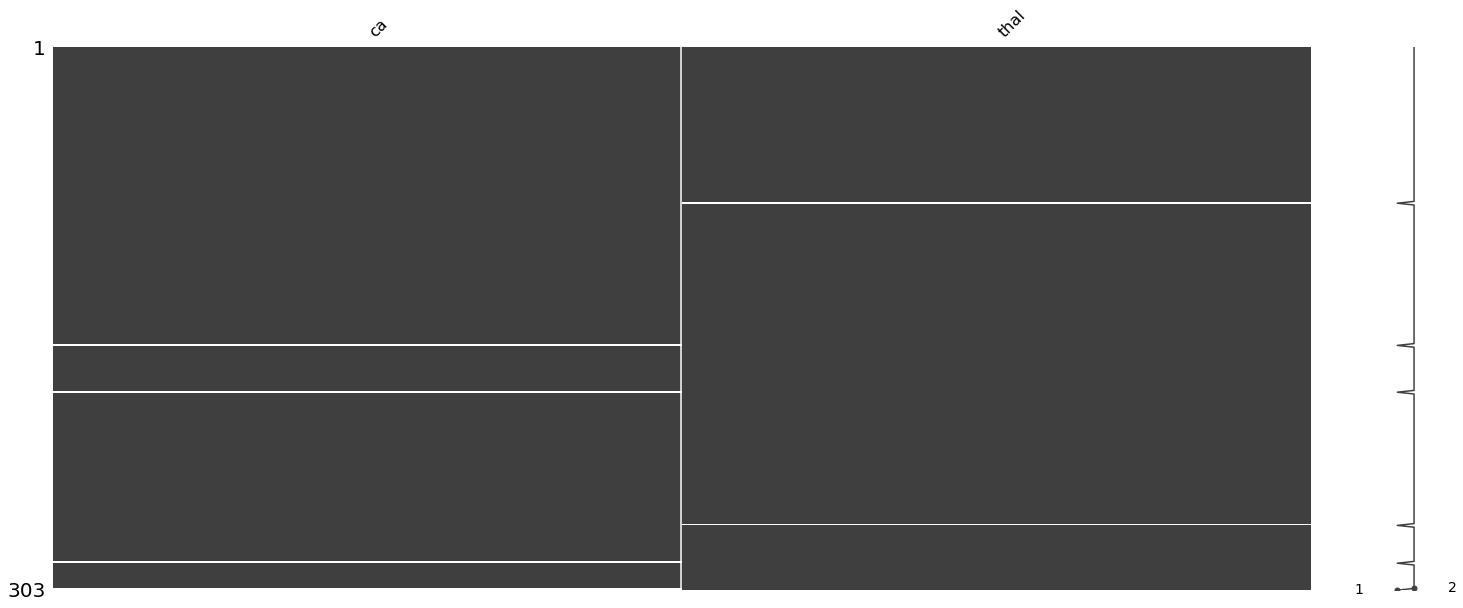

In [ ]:
missingdata_df = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [ ]:
median_value=df['ca'].median()
df['ca']=df['ca'].fillna(median_value)

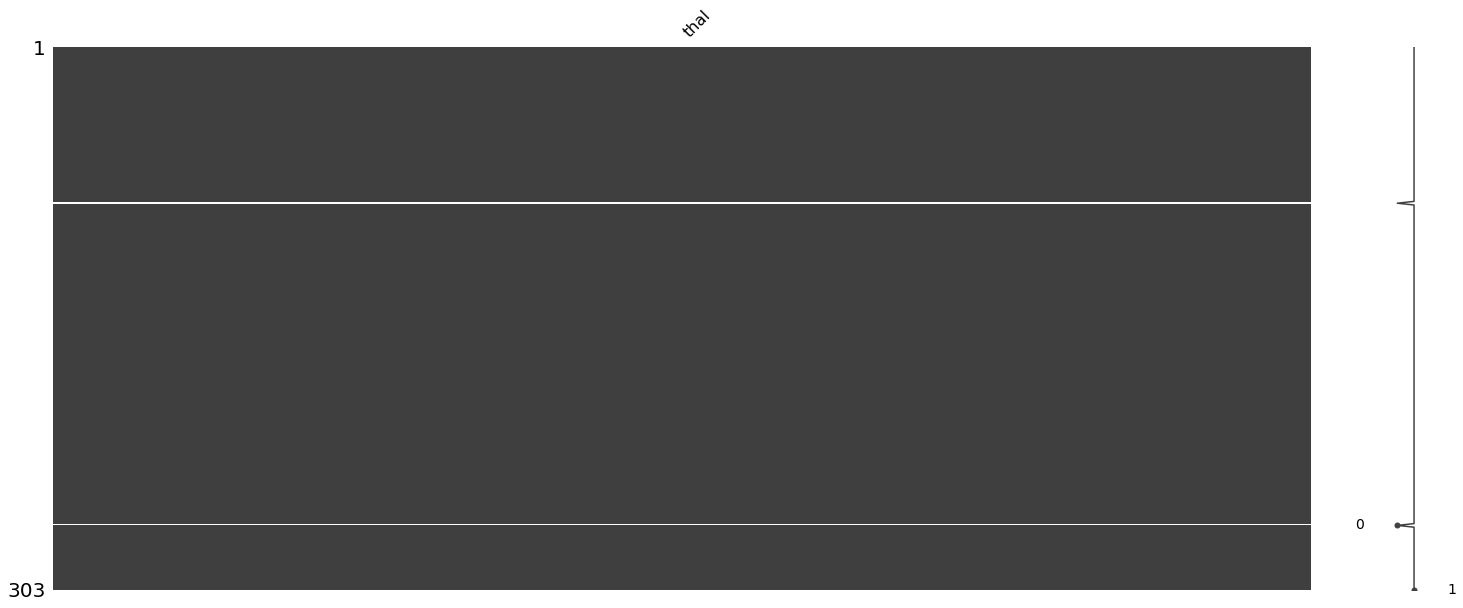

In [ ]:
missingdata_df = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [ ]:
median_value=df['thal'].median()
df['thal']=df['thal'].fillna(median_value)

In [ ]:
df.isnull().values.any()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.5+ KB


# Pengubahan Label dari 5 menjadi 2

In [ ]:
#membuat sebuah fungsi
def getAnalysis(score):
    if score == 0:
        return '0'
    else:
        return '1'
    
df['NewLabel'] = df['num'].apply(getAnalysis)

In [ ]:
df['NewLabel'].value_counts()

0    164
1    139
Name: NewLabel, dtype: int64

# Mengubah tipe data dari object ke float untuk atribut Ca dan Thal

In [ ]:
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
 14  NewLabel  303 non-null    object 
dtypes: float64(3), int64(11), object(1)
memory usage: 37.9+ KB


# Korelasi HeatMap

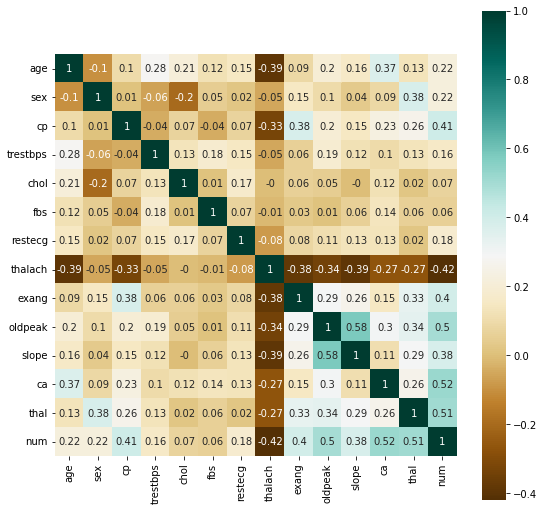

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'BrBG')
plt.show()

# Modelling

In [ ]:
X =  df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [ ]:
y = df['num']

In [ ]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

# Normalisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
parameters = {
                'model__n_neighbors' : np.arange(1,10)
                'model__weights': ('uniform', 'distance'),
                'model__metric': ('minkowski', 'chebyshev'),
                'model__algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute')
}

In [ ]:
classifier_knn = Pipeline([
                          ('model', KNeighborsClassifier()),                        
                          ])

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X,y, test_size=0.3, random_state=2022)

In [ ]:
norm_classifier_knn = GridSearchCV(classifier_knn, parameters, cv=10, n_jobs=-1)

In [ ]:
norm_classifier_knn.fit(X_train_norm,Y_train_norm.ravel())

In [ ]:
norm_classifier_knn.best_estimator_

In [ ]:
for param_name in sorted(parameters.keys()):
    print('%s: %r' %(param_name,norm_classifier_knn.best_params_[param_name]))

# Evaluasi

In [ ]:
norm_y_pred_knn_train = norm_classifier_knn.predict(X_train_norm)

norm_accuracy_knn_train = accuracy_score(Y_train_norm,norm_y_pred_knn_train)
print('Akurasi pada training set: ', norm_accuracy_knn_train)

norm_precision_knn_train = precision_score(Y_train_norm,norm_y_pred_knn_train, average='micro')
print('Precision pada training set: ', norm_precision_knn_train)

norm_recall_knn_train = recall_score(Y_train_norm,norm_y_pred_knn_train, average='micro')
print('Recall pada training set: ', norm_recall_knn_train)

norm_y_pred_knn_test = norm_classifier_knn.predict(X_test_norm)

norm_accuracy_knn_test = accuracy_score(Y_test_norm,norm_y_pred_knn_test)
print('Akurasi pada test set: ', norm_accuracy_knn_test)

norm_precision_knn_test = precision_score(Y_test_norm,norm_y_pred_knn_test, average='micro')
print('Precision pada test set: ', norm_precision_knn_test)

norm_recall_knn_test = recall_score(Y_test_norm,norm_y_pred_knn_test, average='micro')
print('Recall pada test set: ', norm_recall_knn_test)

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_knn_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-12, 12, num=500)).fit(X_train_norm, Y_train_norm)
importance = np.abs(ridge.coef_)
feature_names = pd.array(X.columns)

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
importance

In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-12] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

In [ ]:
X =  df[['Sex','Cp','Fbs','Exang','Ca','Thal']]

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X,y, test_size=0.3, random_state=2022)

In [ ]:
norm_classifier_knn = GridSearchCV(classifier_knn, parameters, cv=10, n_jobs=-1)

In [ ]:
norm_classifier_knn.fit(X_train_norm,Y_train_norm.ravel())

In [ ]:
norm_classifier_knn.best_estimator_

In [ ]:
norm_y_pred_knn_train = norm_classifier_knn.predict(X_train_norm)

norm_accuracy_knn_train = accuracy_score(Y_train_norm,norm_y_pred_knn_train)
print('Akurasi pada training set: ', norm_accuracy_knn_train)

norm_precision_knn_train = precision_score(Y_train_norm,norm_y_pred_knn_train, average='micro')
print('Precision pada training set: ', norm_precision_knn_train)

norm_recall_knn_train = recall_score(Y_train_norm,norm_y_pred_knn_train, average='micro')
print('Recall pada training set: ', norm_recall_knn_train)

norm_y_pred_knn_test = norm_classifier_knn.predict(X_test_norm)

norm_accuracy_knn_test = accuracy_score(Y_test_norm,norm_y_pred_knn_test)
print('Akurasi pada test set: ', norm_accuracy_knn_test)

norm_precision_knn_test = precision_score(Y_test_norm,norm_y_pred_knn_test, average='micro')
print('Precision pada test set: ', norm_precision_knn_test)

norm_recall_knn_test = recall_score(Y_test_norm,norm_y_pred_knn_test, average='micro')
print('Recall pada test set: ', norm_recall_knn_test)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1score_train = f1_score(Y_train_norm,norm_y_pred_knn_train, average='micro')
print('F-1 score pada train set: ', f1score_train)

f1score_test = f1_score(Y_test_norm,norm_y_pred_knn_test, average='micro')
print('F-1 score pada test set: ', f1score_test)

In [ ]:
models = [
                        ('Algoritma KNN Data Normalisasi Training', norm_accuracy_knn_train, norm_recall_knn_train, norm_precision_knn_train, f1score_train),
                        ('Algoritma KNN Data Normalisasi Testing', norm_accuracy_knn_test, norm_recall_knn_test, norm_precision_knn_test, f1score_test)                  
                    ]

In [ ]:
perbandingan = pd.DataFrame(data = models, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F-1 Score'])
perbandingan

Training 80% : Testing 20%

Akurasi = 0.7868852459016393	
Presisi = 0.7868852459016393	
Recall = 0.7868852459016393	
F-1 score = 0.7868852459016393

Training 70% : Testing 30%

Akurasi = 0.7802197802197802	
Presisi = 0.7802197802197802	
Recall = 0.7802197802197802	
F-1 score = 0.7802197802197802